In [4]:
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns

#Necessary for diaplaying all outputs; otherwise only gsd.colums will be displayed. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## How advertising campaigns impact the different categories people?

In [5]:
#Loading the dataframes
products=pd.read_csv("data/products.csv")
transactions=pd.read_csv("data/transactions.csv")
stores=pd.read_csv("data/stores.csv")

In [6]:
# showing the heads of the data frames
products.head()
transactions.head()
stores.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,2009-01-14 00:00:00,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,2009-01-14 00:00:00,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0
2,2009-01-14 00:00:00,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
3,2009-01-14 00:00:00,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1
4,2009-01-14 00:00:00,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0


,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308


In [7]:
products.CATEGORY.unique()

array(['BAG SNACKS', 'ORAL HYGIENE PRODUCTS', 'COLD CEREAL',
       'FROZEN PIZZA'], dtype=object)

In [8]:
transactions.WEEK_END_DATE.unique().size

156

In [9]:
transactions = transactions.dropna(axis=0)
transactions['Discount'] = transactions.FEATURE | transactions.DISPLAY | transactions.TPR_ONLY
transactions['Discount_Percentage']= (transactions.BASE_PRICE - transactions.PRICE)/transactions.BASE_PRICE
transactions.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,Discount,Discount_Percentage
0,2009-01-14 00:00:00,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,1,0.11465
1,2009-01-14 00:00:00,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,0,0.00000
2,2009-01-14 00:00:00,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,0,0.00000
3,2009-01-14 00:00:00,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,1,0.22049
4,2009-01-14 00:00:00,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,0,0.00000


####  Total sale, sale in dicount period, sale in normal period per category

In [10]:
Total_sale = transactions.merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
             .groupby('CATEGORY').UNITS.sum().reset_index()

Total_sale_normal = transactions[transactions.Discount==0]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_NORMAL'})

Total_sale_discount = transactions[transactions.Discount==1]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_DISC'})

In [11]:
sales_combined = Total_sale\
                 .merge(Total_sale_normal, on='CATEGORY', how='left')\
                 .merge(Total_sale_discount, on='CATEGORY', how='left')
sales_combined

,CATEGORY,UNITS,UNITS_NORMAL,UNITS_DISC
0,BAG SNACKS,2601247,1490290,1110957
1,COLD CEREAL,5826783,3301659,2525124
2,FROZEN PIZZA,1341731,609736,731995
3,ORAL HYGIENE PRODUCTS,521140,282085,239055


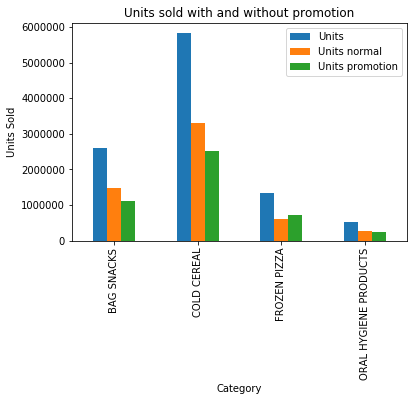

In [12]:
_ = sales_combined.plot(kind='bar', x='CATEGORY', y=['UNITS', 'UNITS_NORMAL', 'UNITS_DISC'],\
                        label=['Units', 'Units normal', 'Units promotion'], title='Units sold with and without promotion')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold")
plt.show()

#### Sales by Feature, Display, or TPR_Only

In [13]:
Total_sale_feature = transactions[transactions.FEATURE==1]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_FEATURE'})
Total_sale_display = transactions[transactions.DISPLAY==1]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_DISPLAY'})
Total_sale_Only = transactions[transactions.TPR_ONLY==1]\
                    .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_ONLY'})

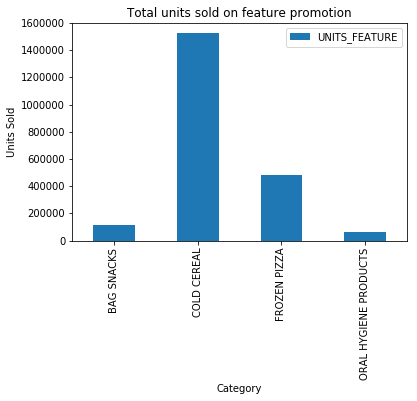

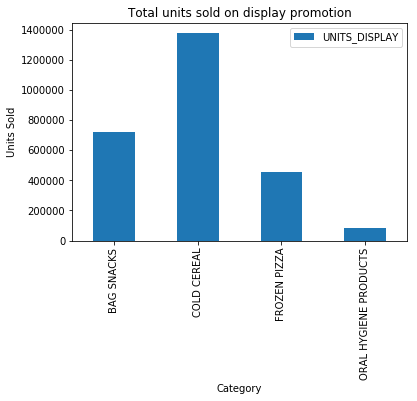

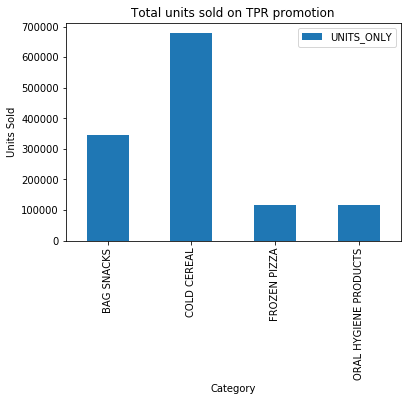

In [14]:
_ = Total_sale_feature.plot(kind='bar', x='CATEGORY', y='UNITS_FEATURE', title='Total units sold on feature promotion')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold")
plt.show()
_ = Total_sale_display.plot(kind='bar', x='CATEGORY', y='UNITS_DISPLAY', title='Total units sold on display promotion')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold")
plt.show()
_ = Total_sale_Only.plot(kind='bar', x='CATEGORY', y='UNITS_ONLY', title='Total units sold on TPR promotion')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold")
plt.show()

### Normalised sales

In [15]:
Ndays_normal = transactions[transactions.Discount==0]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_NORMAL'})

Ndays_discount = transactions[transactions.Discount==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_DISC'})

In [16]:
Ndays_normal

,CATEGORY,NORM_UNITS_NORMAL
0,BAG SNACKS,88718
1,COLD CEREAL,129471
2,FROZEN PIZZA,77149
3,ORAL HYGIENE PRODUCTS,80203


In [17]:
#Normalised data sets

Normalised_sale_normal = Total_sale_normal.copy(deep= True)
Normalised_sale_normal.UNITS_NORMAL = Normalised_sale_normal.UNITS_NORMAL\
                                      /Ndays_normal.NORM_UNITS_NORMAL

Normalised_sale_discount = Total_sale_discount.copy(deep= True)
Normalised_sale_discount.UNITS_DISC = Normalised_sale_discount.UNITS_DISC\
                                      /Ndays_discount.NORM_UNITS_DISC


In [18]:
Normalised_sales_combined = Normalised_sale_normal\
                 .merge(Normalised_sale_discount, on='CATEGORY', how='left')
Normalised_sales_combined

,CATEGORY,UNITS_NORMAL,UNITS_DISC
0,BAG SNACKS,16.798057,28.731399
1,COLD CEREAL,25.501147,62.804656
2,FROZEN PIZZA,7.903356,21.512182
3,ORAL HYGIENE PRODUCTS,3.517138,6.585356


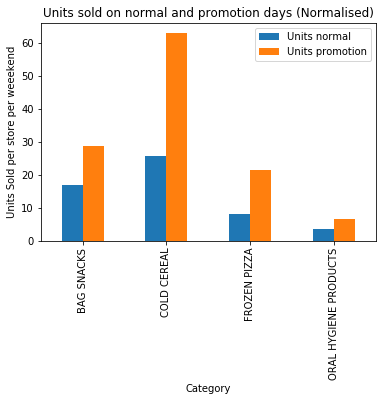

In [19]:
_ = Normalised_sales_combined.plot(kind='bar', x='CATEGORY', y=['UNITS_NORMAL', 'UNITS_DISC'],\
                        label=['Units normal', 'Units promotion'],\
                                   title='Units sold on normal and promotion days (Normalised)')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold per store per weeekend")
plt.show()

#### Sales by Feature, Display, or TPR_Only (Normalised)

In [20]:
Ndays_feature = transactions[transactions.FEATURE==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_FEATURE'})
 
Ndays_display = transactions[transactions.DISPLAY==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_DISPLAY'})

Ndays_Only = transactions[transactions.TPR_ONLY==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_ONLY'})

In [21]:
#Normalised most sucessful type of promotion: 

Normalised_sale_feature = Total_sale_feature.copy(deep= True)
Normalised_sale_feature.UNITS_FEATURE = Normalised_sale_feature.UNITS_FEATURE\
                                     /Ndays_feature.NORM_UNITS_FEATURE

Normalised_sale_display = Total_sale_display.copy(deep= True)
Normalised_sale_display.UNITS_DISPLAY = Normalised_sale_display.UNITS_DISPLAY\
                                      /Ndays_display.NORM_UNITS_DISPLAY

Normalised_sale_Only = Total_sale_Only.copy(deep= True)
Normalised_sale_Only.UNITS_ONLY = Normalised_sale_Only.UNITS_ONLY\
                                      /Ndays_Only.NORM_UNITS_ONLY

In [22]:
Normalised_disc_combined = Normalised_sale_feature\
                 .merge(Normalised_sale_display, on='CATEGORY', how='left')\
                 .merge(Normalised_sale_Only, on='CATEGORY', how='left')
Normalised_disc_combined

,CATEGORY,UNITS_FEATURE,UNITS_DISPLAY,UNITS_ONLY
0,BAG SNACKS,35.140462,44.315673,16.704998
1,COLD CEREAL,93.893280,92.303022,36.434502
2,FROZEN PIZZA,25.967638,27.746035,12.197750
3,ORAL HYGIENE PRODUCTS,10.210232,8.182900,5.366363


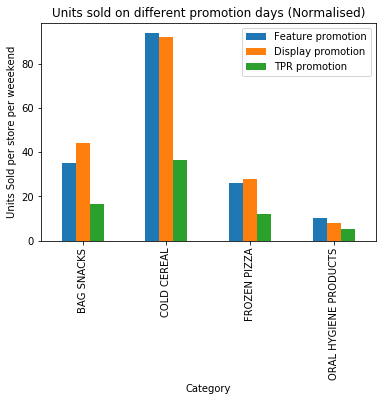

In [23]:
_ = Normalised_disc_combined.plot(kind='bar', x='CATEGORY', y=['UNITS_FEATURE', 'UNITS_DISPLAY', 'UNITS_ONLY'],\
                        label=['Feature promotion', 'Display promotion', 'TPR promotion'],\
                        title='Units sold on different promotion days (Normalised)')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold per store per weeekend")
plt.show()

#### How discount percentages impact sales

In [24]:
def discount_percentage_database(discount_class_length):
    discount = np.linspace(0,1,round(1/discount_class_length)+1)
    #discount = [ '%.2f' % elem for elem in discount ]
    discount_range = zip(discount[0:-1],discount[1:])
    normalised_bypercentage = pd.DataFrame({'CATEGORY': products.CATEGORY.unique()})
    for discount_bin in discount_range:
        temp='{}-{}%'.format('%.2f' % discount_bin[0],'%.2f' % discount_bin[1])
        sale_temp = transactions[(transactions.Discount_Percentage > discount_bin[0]) &\
                                  (transactions.Discount_Percentage <= discount_bin[1])]\
                      .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                      .groupby('CATEGORY').UNITS.sum().reset_index()\
                      .rename(columns={'UNITS':temp})
        ndays_temp = transactions[(transactions.Discount_Percentage > discount_bin[0]) &\
                                  (transactions.Discount_Percentage <= discount_bin[1])]\
                      .groupby(['WEEK_END_DATE','UPC'])\
                    .STORE_NUM.size().reset_index()\
                      .groupby('UPC').STORE_NUM.sum().reset_index()\
                      .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                      .groupby('CATEGORY').STORE_NUM.sum().reset_index()
        sale_temp[temp] = sale_temp[temp]/ndays_temp.STORE_NUM
        normalised_bypercentage = normalised_bypercentage.merge(sale_temp, on='CATEGORY', how='left') 
    return normalised_bypercentage

In [25]:
discount_sales = discount_percentage_database(0.3)
discount_sales

,CATEGORY,0.00-0.33%,0.33-0.67%,0.67-1.00%
0,BAG SNACKS,25.368228,14.593081,4.963636
1,ORAL HYGIENE PRODUCTS,5.634873,9.574208,9.037037
2,COLD CEREAL,53.763967,118.007242,47.705882
3,FROZEN PIZZA,19.785781,32.041645,1.750000


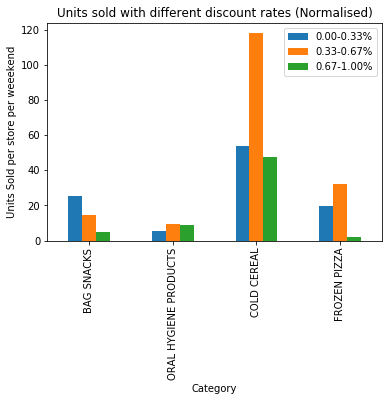

In [26]:
_ = discount_sales.plot(kind='bar', x='CATEGORY', y=discount_sales.columns.to_list()[1:],\
                        title='Units sold with different discount rates (Normalised)')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold per store per weeekend")
plt.show()

# How frequency of discounts at a store effects sales  

In [27]:
# transactions=pd.read_excel("data/userdata.xlsx", sheet_name='dh Transaction Data')
# transactions1=transactions.copy(deep = True)
# transactions1=transactions1.dropna(axis='columns', how='all')
# transactions1.columns=transactions1.iloc[0].to_list()
# transactions1.drop(0, inplace=True)
# transactions1 =transactions1.to_csv ('data/products.csv', index = None, header=True)